In [7]:
# 원그래프 그리기
# 명확한 값 구분을 위해 범례 추가
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지


In [ ]:
# 원그래프 그리기
# 명확한 값 구분을 위해 범례 추가
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결

try:
    # SQL 쿼리 실행
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # SQLite에서 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)

    # 한글 깨짐 방지: 컬럼명 공백 제거
    df.columns = df.columns.str.strip()

    # 데이터 확인
    print(df)

    # 📌 원 그래프 시각화 (직무별 어학 요구 비율)
    unique_duties = df["duty_category"].unique()

    # 각 직무별 원 그래프 생성
    for duty in unique_duties:
        df_duty = df[df["duty_category"] == duty]

        # 원 그래프 생성
        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,  # 퍼센트 표시를 원 밖으로 이동
            colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]  ,  # 색상 지정
        )

        # 범례 추가
        ax.legend(wedges, df_duty["language_required"], title="어학 능력", loc="best", bbox_to_anchor=(1, 0.5))

        # 제목 설정
        plt.title(f"{duty} 직무별 어학 능력 요구 비율")

        # 원 그래프 표시
        plt.subplots_adjust(right=0.75)  # 범례 공간 확보
        plt.show()

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    # DB 연결 해제
    conn.close() 


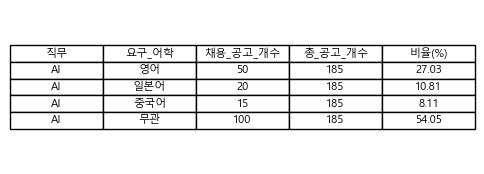

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# 예제 데이터
data = {
    "직무": ["AI", "AI", "AI", "AI"],
    "요구_어학": ["영어", "일본어", "중국어", "무관"],
    "채용_공고_개수": [50, 20, 15, 100],
    "총_공고_개수": [185, 185, 185, 185],
    "비율(%)": [27.03, 10.81, 8.11, 54.05]
}

df = pd.DataFrame(data)

# 표 시각화
fig, ax = plt.subplots(figsize=(6, 2))  # 표 크기 조정
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")

# 표 출력
plt.show()


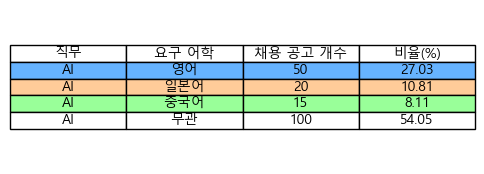

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 예제 데이터
data = [
    ["AI", "영어", 50, 27.03],
    ["AI", "일본어", 20, 10.81],
    ["AI", "중국어", 15, 8.11],
    ["AI", "무관", 100, 54.05]
]

columns = ["직무", "요구 어학", "채용 공고 개수", "비율(%)"]

# 색상 설정 (행마다 다른 색상)
row_colors = ["#66b3ff", "#ffcc99", "#99ff99", "#ffffff"]

# 표 생성
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=data, colLabels=columns, cellLoc="center", loc="center", cellColours=[[color]*4 for color in row_colors])

# 표 출력
plt.show()


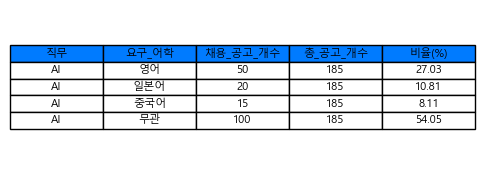

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# 예제 데이터
data = {
    "직무": ["AI", "AI", "AI", "AI"],
    "요구_어학": ["영어", "일본어", "중국어", "무관"],
    "채용_공고_개수": [50, 20, 15, 100],
    "총_공고_개수": [185, 185, 185, 185],
    "비율(%)": [27.03, 10.81, 8.11, 54.05]
}

df = pd.DataFrame(data)

# ✅ 표 시각화
fig, ax = plt.subplots(figsize=(6, 2))  # 표 크기 조정
ax.axis("tight")
ax.axis("off")

# ✅ 테이블 생성 (헤더에 색상 적용)
table = ax.table(
    cellText=df.values, 
    colLabels=df.columns, 
    cellLoc="center", 
    loc="center",
    colColours=["#007bff"] * len(df.columns)  # 헤더 색상을 파란색으로 설정
)

# ✅ 표 출력
plt.show()


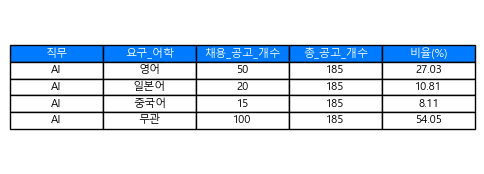

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# 예제 데이터
data = {
    "직무": ["AI", "AI", "AI", "AI"],
    "요구_어학": ["영어", "일본어", "중국어", "무관"],
    "채용_공고_개수": [50, 20, 15, 100],
    "총_공고_개수": [185, 185, 185, 185],
    "비율(%)": [27.03, 10.81, 8.11, 54.05]
}

df = pd.DataFrame(data)

# ✅ 표 시각화
fig, ax = plt.subplots(figsize=(6, 2))  # 표 크기 조정
ax.axis("tight")
ax.axis("off")

# ✅ 테이블 생성 (헤더에 색상 적용)
table = ax.table(
    cellText=df.values, 
    colLabels=df.columns, 
    cellLoc="center", 
    loc="center",
    colColours=["#007bff"] * len(df.columns)  # 헤더 색상을 파란색(#007bff)으로 설정
)

# ✅ 헤더 글씨를 하얀색(#ffffff)으로 변경
for i, key in enumerate(df.columns):
    cell = table[0, i]  # 헤더 셀 가져오기
    cell.set_text_props(color="white")  # 글씨 색상을 흰색으로 변경

# ✅ 표 출력
plt.show()


In [9]:
import pandas as pd

# 스타일 지정
styled_df = df.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('background', '#4CAF50'), ('color', 'white'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
])

# Jupyter Notebook에서 보기 좋게 출력
styled_df


,직무,요구_어학,채용_공고_개수,총_공고_개수,비율(%)
0,AI,영어,50,185,27.030000
1,AI,일본어,20,185,10.810000
2,AI,중국어,15,185,8.110000
3,AI,무관,100,185,54.050000


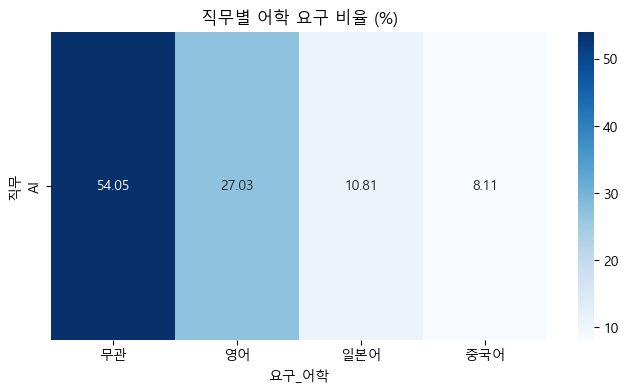

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 테이블 데이터 변환
pivot_table = df.pivot(index="직무", columns="요구_어학", values="비율(%)")

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".2f")
plt.title("직무별 어학 요구 비율 (%)")
plt.show()


In [5]:
from prettytable import PrettyTable

# PrettyTable 생성
table = PrettyTable()
table.field_names = df.columns.tolist()  # 컬럼명 추가

# 행 추가
for row in df.itertuples(index=False):
    table.add_row(row)

print(table)


+------+-----------+----------------+--------------+---------+
| 직무 | 요구_어학 | 채용_공고_개수 | 총_공고_개수 | 비율(%) |
+------+-----------+----------------+--------------+---------+
|  AI  |    영어   |       50       |     185      |  27.03  |
|  AI  |   일본어  |       20       |     185      |  10.81  |
|  AI  |   중국어  |       15       |     185      |   8.11  |
|  AI  |    무관   |      100       |     185      |  54.05  |
+------+-----------+----------------+--------------+---------+
